## Building A Handwritten Digits Classifier

### Project description

In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images, we'll gradually build a neural network by adding hidden layers and by testing with differents models. Train, test, and improve a few different deep neural networks for image classification. The handwritten images that will be used to train different neural network models are detailed in this [article](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.852.5499&rep=rep1&type=pdf).


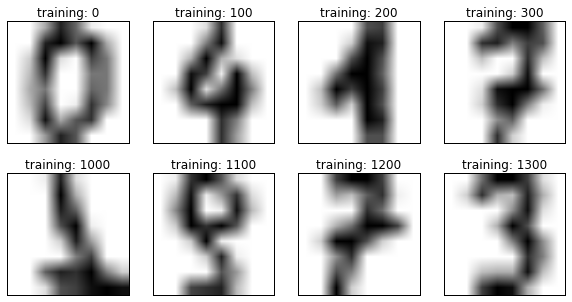

In [1]:
### We gonna work with datasets pre-loaded, where there are a copy 
### of the hand-written digits dataset from UCI(university
### of californie irvine) machine learning repository.

from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### let's load data and visualize some of the images
data, target = load_digits(return_X_y = True)
features= pd.DataFrame(data)
target= pd.Series(target)

image_rows= [0,100,200,300,1000,1100,1200,1300]

fig= plt.figure(figsize=(10,5))
n= 0
for r in image_rows:
    image_feature= features.iloc[r]
    np_image= image_feature.values
    np_image= np_image.reshape(8,8)
    ax= fig.add_subplot(2,4,n+1)
    n+= 1
    ax.set_title("training: %i"%r)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(np_image, cmap= "gray_r")
    
plt.show()

In [2]:
### Now let's train a kneighborsclassifier model 
### and test his efficiency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

### let's build our pipeline for this!
def train(n,train,target):
    knn= KNeighborsClassifier(n_neighbors= n)
    knn.fit(train,target)
    return knn

def test(knn,test,target):
    prediction= knn.predict(test)
    return accuracy_score(target,prediction)

def cross_validate(n,k,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        knc = train(n, train_features, train_target)
        train_accuracy = test(knc, train_features, train_target)
        test_accuracy = test(knc, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [3]:
### let's make a simple test
train_features= features[0:int(features.shape[0]*0.8)]
train_target= target[0:int(features.shape[0]*0.8)]
test_features= features[int(features.shape[0]*0.8):]
test_target= target[int(features.shape[0]*0.8):]

knn= train(5,train_features,train_target)
accuracy= test(knn,test_features,test_target)
print(accuracy)

0.9638888888888889


In [4]:
### let's make cross-validation test with 4-fold
train_accuracies,test_accuracies= cross_validate(5,4,features,target)
mean_train_accuracies= np.mean(train_accuracies)
mean_test_accuracies= np.mean(test_accuracies)
print(mean_train_accuracies,mean_test_accuracies)

0.9897977756923287 0.9849777282850779


In [7]:
### let's make tests with different n_neighbors values
n_neighbors=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
accuracies_n_s= []
for n in n_neighbors:
    knn= train(n,train_features,train_target)
    accuracie_n= test(knn,test_features,test_target)
    accuracies_n_s.append(accuracie_n)
mean_accuracie_n= np.mean(accuracies_n_s)
print(mean_accuracie_n,accuracies_n_s)

0.9544444444444443 [0.9555555555555556, 0.9638888888888889, 0.9666666666666667, 0.9666666666666667, 0.9638888888888889, 0.9527777777777777, 0.9527777777777777, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9472222222222222, 0.95, 0.9472222222222222]


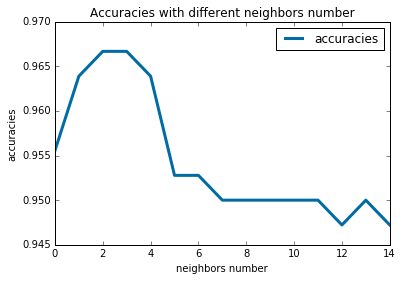

In [9]:
### let's visualize these results
x= range(0,15)
y= accuracies_n_s
fig= plt.figure(figsize=(6,4))
plt.plot(x,y, c= (0/255,107/255,164/255), linewidth=3, label='accuracies')
plt.title("Accuracies with different neighbors number")
plt.xlabel("neighbors number")
plt.ylabel("accuracies")
plt.legend(loc="upper right")
plt.show()

In [10]:
### now we know that the best n_neighbors value is 3,4
### so let's take 4 and make tests with different k-fold

folds= [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
mean_train_ac= []
mean_test_ac= []
for f in folds:
    train_accuracies,test_accuracies= cross_validate(4,f,features,target)
    mean_train_ac.append(np.mean(train_accuracies))
    mean_test_ac.append(np.mean(test_accuracies))
print(mean_train_ac)
print(mean_test_ac)

[0.9872024347765768, 0.9897050639955483, 0.9907250753955928, 0.9915136715630908, 0.9918753840569434, 0.9918382396318801, 0.9918911833597815, 0.9920700726321873, 0.9919001447078438, 0.9920423601594766, 0.9919563286096325, 0.9920236782248358, 0.991995250842038, 0.9919708060323963, 0.9919866107614341]
[0.977182640449299, 0.978297161936561, 0.9833073496659243, 0.98330547818013, 0.9849721293199553, 0.9849721199277377, 0.9844146825396825, 0.984966499162479, 0.9849782743637492, 0.9855433732809165, 0.9844258016405668, 0.984985924304035, 0.9844355620155039, 0.9849906629318395, 0.9849922961441213]


In [11]:
print(np.mean(mean_train_ac))
print(np.mean(mean_test_ac))

0.9913797536499506
0.9837179970575001


[]

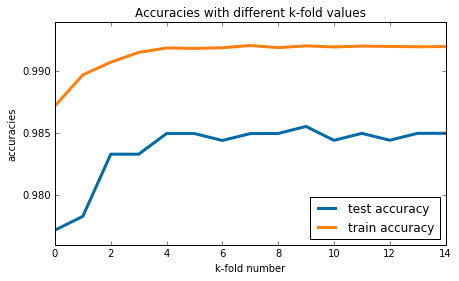

In [12]:
### let's visualize these results

x= range(0,15)
y_test= mean_test_ac
y_train= mean_train_ac
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (0/255,107/255,164/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (255/255, 128/255, 14/255), linewidth=3, label='train accuracy')
ax.set_xlabel("k-fold number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with different k-fold values")
ax.legend(loc="lower right")
plt.plot()

### Summary of the results

<table>
  <tr>
    <th></th>
    <th>Accuracies</th>
    <th>neighbors</th>
    <th>k-folds</th>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.9638888888888889</td>
    <td>by default</td>
    <td>//</td>
  </tr>
  <tr>
    <td>Cross validation(train/test)</td>
    <td>0.9897977756923287 / 0.9849777282850779</td>
    <td>by default</td>
    <td>4</td>
  </tr>
  <tr>
    <td>Test</td>
    <td>0.9544444444444443</td>
    <td>15</td>
    <td>//</td>
  </tr>
  <tr>
    <td>Cross validation(train/test)</td>
    <td>0.9913797536499506 / 0.9837179970575001</td>
    <td>4</td>
    <td>15</td>
  </tr>
</table>

### Let's build now a neural network by using MLPClassifier package

let's build a neuron network we will reduce the high consumption of memory as we did with the knn algorithm, also we will have a model represented on which we can easily make improvements.

In [17]:
from sklearn.neural_network import MLPClassifier

### let's rewrite the pipeline
def train(n,activate,train,target):
    nn= MLPClassifier(hidden_layer_sizes= (n,), activation= activate,max_iter= 1000)
    nn.fit(train,target)
    return nn

def test(nn,test,target):
    prediction= nn.predict(test)
    return accuracy_score(target,prediction)

def cross_validate(k,n,activate,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        nn = train(n,activate, train_features, train_target)
        train_accuracy = test(nn, train_features, train_target)
        test_accuracy = test(nn, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [18]:
### Using 4-fold cross validation
### and train, a test neural with different single hidden layer of neurons
### we begining with the relu activation function

hidden_layers= [8,16,32,64,128,256]
activate= "relu"
train_accuracies_n= []
test_accuracies_n= []
for hl in hidden_layers:
    train_accuracies,test_accuracies= cross_validate(4,hl,activate,features,target)
    train_accuracies_n.append(np.mean(train_accuracies))
    test_accuracies_n.append(np.mean(test_accuracies))
    
print(train_accuracies_n)
print(test_accuracies_n)

[0.9940643181132266, 0.9998145400593472, 0.9998144023756496, 1.0, 1.0, 1.0]
[0.9332195001237318, 0.9510393466963623, 0.9671739668398912, 0.9682826033160109, 0.9732962138084632, 0.9821987131898045]


[]

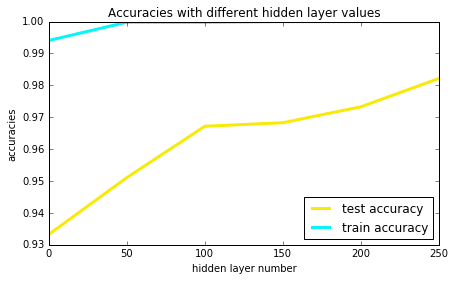

In [25]:
### let's visualize 

x= range(0,300,50)
y_test= test_accuracies_n
y_train= train_accuracies_n
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (249/255,234/255,6/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (6/255, 245/255, 249/255), linewidth=3, label='train accuracy')
ax.set_xlabel("hidden layer number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with different hidden layer values")
ax.legend(loc="lower right")
plt.plot()

We notice that on the two curves the difference is reduced as the number of neurons increases and it is from 150 neurons in a hidden layer that we begin to reduce the overfitting and it is better reduced to 250 neurons.

In [26]:
### let's test with the tanh activation function

activate= "tanh"
train_accuracies_n= []
test_accuracies_n= []
for hl in hidden_layers:
    train_accuracies,test_accuracies= cross_validate(4,hl,activate,features,target)
    train_accuracies_n.append(np.mean(train_accuracies))
    test_accuracies_n.append(np.mean(test_accuracies))
    
print(train_accuracies_n)
print(test_accuracies_n)

[0.9740317531650728, 0.9988869649886878, 0.9992578848699936, 1.0, 1.0, 1.0]
[0.9065169512496907, 0.9521529324424647, 0.9593850532046524, 0.9677344716654294, 0.9738517693640188, 0.9766344964117792]


[]

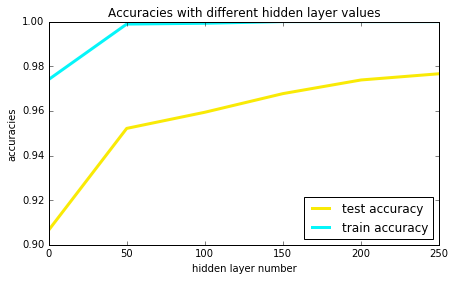

In [27]:
### let's visualize 

x= range(0,300,50)
y_test= test_accuracies_n
y_train= train_accuracies_n
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (249/255,234/255,6/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (6/255, 245/255, 249/255), linewidth=3, label='train accuracy')
ax.set_xlabel("hidden layer number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with different hidden layer values")
ax.legend(loc="lower right")
plt.plot()

We can quickly conclude that the relu activation function offers better performances than tanh.

Adding more neurons to a single hidden layer vastly improved the classification accuracy. Let's try using two hidden layers and continue to increase the number of neurons in each layer.

In [28]:
### let's use now 2 hidden layers
### and modify cross_validate, train functions

def train(n1,n2,activate,train,target):
    nn= MLPClassifier(hidden_layer_sizes= (n1,n2), activation= activate,max_iter= 1000)
    nn.fit(train,target)
    return nn

def cross_validate(k,n1,n2,activate,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        nn = train(n1,n2,activate, train_features, train_target)
        train_accuracy = test(nn, train_features, train_target)
        test_accuracy = test(nn, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [29]:
### let's use 64 neurons for the 2 layers

train_accuracies,test_accuracies= cross_validate(4,64,64,activate,features,target)
print(train_accuracies)
print(test_accuracies)

[1.0, 1.0, 1.0, 1.0]
[0.96, 0.9621380846325167, 0.977728285077951, 0.9665924276169265]


[]

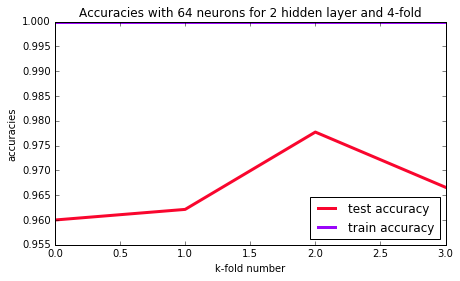

In [30]:
### let's visualize these accuracies

x= range(0,4)
y_test= test_accuracies
y_train= train_accuracies
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (249/255,6/255,46/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (153/255, 6/255, 249/255), linewidth=3, label='train accuracy')
ax.set_xlabel("k-fold number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with 64 neurons for 2 hidden layer and 4-fold")
ax.legend(loc="lower right")
plt.plot()

we notice that at 2-fold there is a peak which shows the best performance reached by the model, then from 0 to 1.5 there is a high level of overfitting.

Now let's increase k-fold to 6 and the hidden layers number to 3

In [31]:
### let's modify still pipeline

def train(n1,n2,n3,train,target):
    nn= MLPClassifier(hidden_layer_sizes= (n1,n2,n3),max_iter= 1000)
    nn.fit(train,target)
    return nn

def cross_validate(k,n1,n2,n3,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        nn = train(n1,n2,n3, train_features, train_target)
        train_accuracy = test(nn, train_features, train_target)
        test_accuracy = test(nn, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [32]:
### the cross validation test will be making with several hidden layers

hidden_layers= [10,64,128]
train_accuracies_n= []
test_accuracies_n= []
for hl in hidden_layers:
    train_accuracies,test_accuracies= cross_validate(6,hl,hl,hl,features,target)
    train_accuracies_n.append(np.mean(train_accuracies))
    test_accuracies_n.append(np.mean(test_accuracies))
    
print(train_accuracies_n)
print(test_accuracies_n)

[0.9926556123669976, 1.0, 1.0]
[0.937675585284281, 0.9721869193608325, 0.9788647342995169]


[]

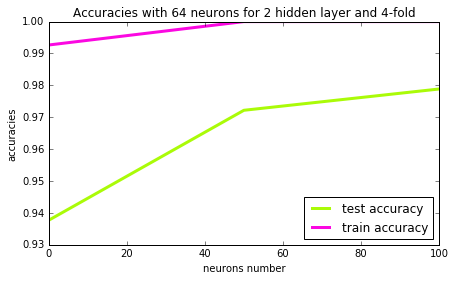

In [35]:
### let's visualize these accuracies

x= range(0,150,50)
y_test= test_accuracies_n
y_train= train_accuracies_n
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (170/255,251/255,8/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (251/255, 8/255, 225/255), linewidth=3, label='train accuracy')
ax.set_xlabel("neurons number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with 64 neurons for 2 hidden layer and 4-fold")
ax.legend(loc="lower right")
plt.plot()

we notice that at 50 neurons, there is an improvement of the model because the test curve is closer to the train curve, which reduces the over-fitting at best.

### Now let's build Decision Tree and Random Forest models and analyze the results

In [36]:
### let's modify our pipeline

from sklearn.tree import DecisionTreeClassifier

def train(train,target):
    dt= DecisionTreeClassifier()
    dt.fit(train,target)
    return dt

def test(dt,test,target):
    prediction= dt.predict(test)
    return accuracy_score(target,prediction)

def cross_validate(k,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        dt = train(train_features, train_target)
        train_accuracy = test(dt, train_features, train_target)
        test_accuracy = test(dt, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [37]:
### let's test it, with cross validation in 4-fold

train_accuracies,test_accuracies= cross_validate(4,features,target)
print(train_accuracies)
print(test_accuracies)

[1.0, 1.0, 1.0, 1.0]
[0.8466666666666667, 0.8396436525612472, 0.8641425389755011, 0.8596881959910914]


In [50]:
### let's test with several values of the min_samples_leaf

def train(m_s_l,train,target):
    dt= DecisionTreeClassifier(min_samples_leaf= m_s_l)
    dt.fit(train,target)
    return dt

def cross_validate(k,m_s_l,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        dt = train(m_s_l,train_features, train_target)
        train_accuracy = test(dt, train_features, train_target)
        test_accuracy = test(dt, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [51]:
min_samples_leafs= [1,2,3,4,5,6,7,8,9,10]
train_accuracies_d= []
test_accuracies_d= []

for m in min_samples_leafs:
    train_accuracies,test_accuracies= cross_validate(4,m,features,target)
    train_accuracies_d.append(np.mean(train_accuracies))
    test_accuracies_d.append(np.mean(test_accuracies))
    
print(train_accuracies_d)
print(test_accuracies_d)

[1.0, 0.9675384523030628, 0.9486185093151283, 0.9369331562170248, 0.9259886790956494, 0.9148594304521092, 0.9052130352316059, 0.8987208358391766, 0.8870341059040971, 0.8798011682186373]
[0.8480895817866865, 0.8414006434050978, 0.8397389260084137, 0.8313895075476367, 0.8364006434050977, 0.8291635733729275, 0.8235993565949022, 0.8197018064835436, 0.8108042563721851, 0.81303142786439]


[]

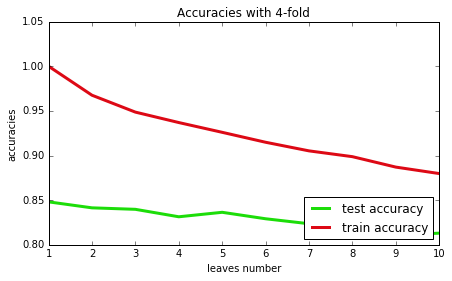

In [52]:
### let's visualize it

x= range(1,11)
y_test= test_accuracies_d
y_train= train_accuracies_d
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (28/255,221/255,9/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (221/255, 9/255, 21/255), linewidth=3, label='train accuracy')
ax.set_xlabel("leaves number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with 4-fold")
ax.legend(loc="lower right")
plt.plot()

We notice that the more the number of sheets increases, the more the overfit decreases.

In [53]:
### Also let's test with Random Forest Models
from sklearn.ensemble import RandomForestClassifier

### let's modify still pipeline

def train(train,target):
    rf= RandomForestClassifier()
    rf.fit(train,target)
    return rf

def test(rf,test,target):
    prediction= rf.predict(test)
    return accuracy_score(target,prediction)

def cross_validate(k,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        rf = train(train_features, train_target)
        train_accuracy = test(rf, train_features, train_target)
        test_accuracy = test(rf, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [54]:
### let's test it, with cross validation in 4-fold

train_accuracies,test_accuracies= cross_validate(4,features,target)
print(train_accuracies)
print(test_accuracies)

[0.9992576095025983, 1.0, 0.9992581602373887, 0.9985163204747775]
[0.9377777777777778, 0.9487750556792873, 0.9576837416481069, 0.9510022271714922]


In [55]:
### let's test with several values of the min_samples_leaf

def train(m_s_l,train,target):
    dt= RandomForestClassifier(min_samples_leaf= m_s_l)
    dt.fit(train,target)
    return dt

def cross_validate(k,m_s_l,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        dt = train(m_s_l,train_features, train_target)
        train_accuracy = test(dt, train_features, train_target)
        test_accuracy = test(dt, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [56]:
min_samples_leafs= [1,2,3,4,5,6,7,8,9,10]
train_accuracies_d= []
test_accuracies_d= []

for m in min_samples_leafs:
    train_accuracies,test_accuracies= cross_validate(4,m,features,target)
    train_accuracies_d.append(np.mean(train_accuracies))
    test_accuracies_d.append(np.mean(test_accuracies))
    
print(train_accuracies_d)
print(test_accuracies_d)

[0.9994434824943439, 0.9972175501554172, 0.9936931228645258, 0.9883136831160134, 0.9836771845996929, 0.9781126979616204, 0.9740318908487704, 0.967353680780898, 0.9597506493163177, 0.9606764344989085]
[0.9415738678544916, 0.9460319227913883, 0.9404652313783717, 0.9426899282355853, 0.9382318732986885, 0.9237676317743133, 0.9337861915367484, 0.9276688938381589, 0.9182021776787923, 0.9293293739173472]


[]

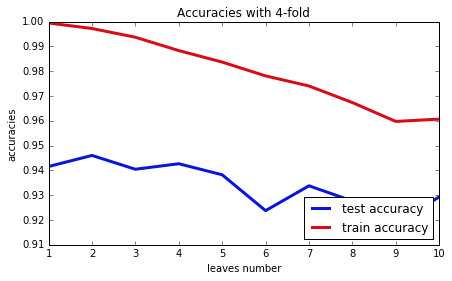

In [57]:
### let's visualize it

x= range(1,11)
y_test= test_accuracies_d
y_train= train_accuracies_d
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (9/255,21/255,221/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (221/255, 9/255, 21/255), linewidth=3, label='train accuracy')
ax.set_xlabel("leaves number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with 4-fold")
ax.legend(loc="lower right")
plt.plot()

We have improved our performance with the random forest model.

### Now let's make the visualization of MLP Weights on MNIST

The MNIST database for Modified, or Mixed National Institute of Standards and Technology, is a database of handwritten numbers. It is a data set widely used in machine learning.

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, maybe regularization was too low or the learning rate too high. ~~ [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)


[(64, 256), (256, 256), (256, 10)]
First layer:


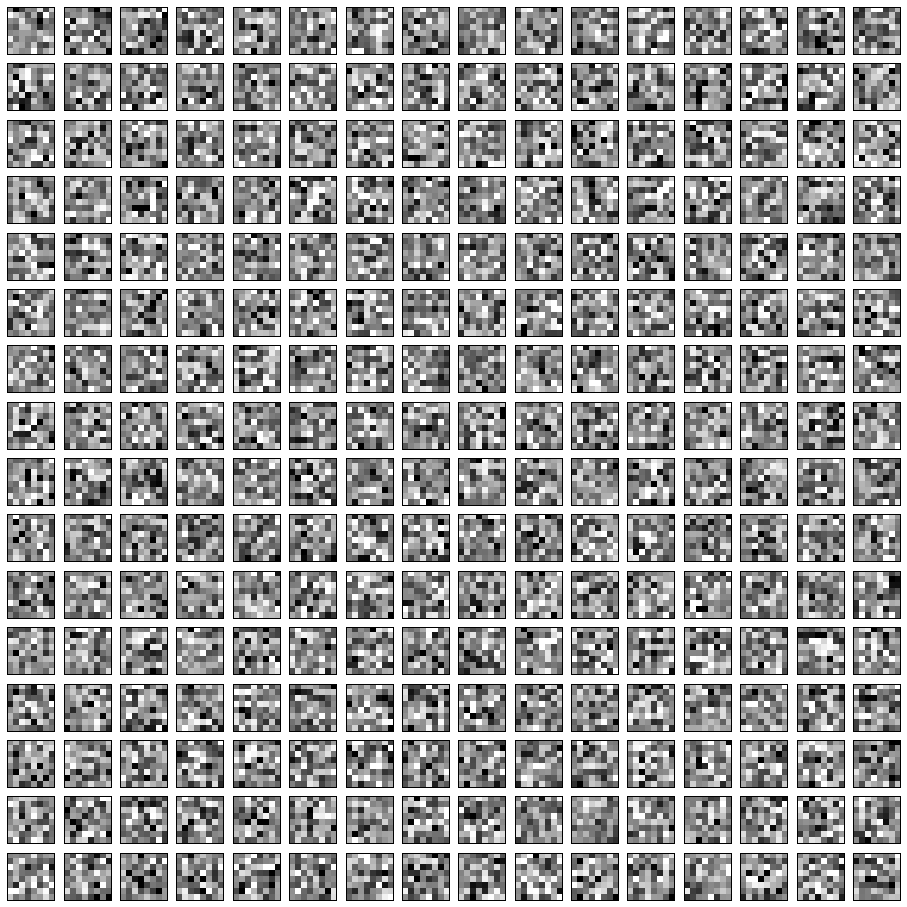

Second layer:


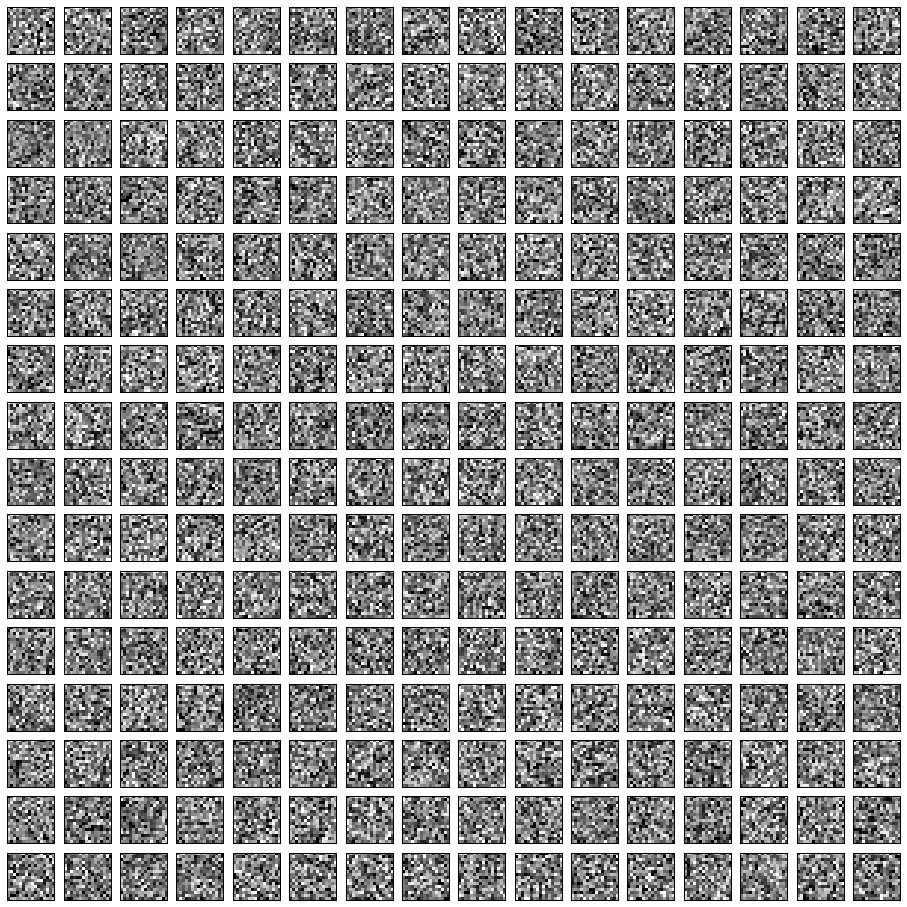

Output layer:


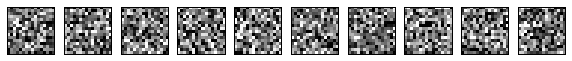

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.9633333333333334,
  0.96,
  0.9566666666666667,
  0.9698996655518395,
  0.9832775919732442,
  0.939799331103679])

In [61]:
### Let's add a function into our pipeline

def train(n,train,target):
    nn= MLPClassifier(hidden_layer_sizes= n,max_iter= 1000)
    nn.fit(train,target)
    return nn

def test(nn,test,target):
    prediction= nn.predict(test)
    return accuracy_score(target,prediction)

def visualize_nn_weights(coef, X_train, y_train, X_test, y_test, layer = 0):
    row = 16
    col = 16
    fig_size = (16, 16)
    if layer ==2:
        row = 1
        col = 10
        fig_size = (10, 36)
    fig, axes = plt.subplots(row, col, figsize=fig_size)
    # use global min / max to ensure all weights are shown on the same scale
    vmin, vmax = coef[layer].min(), coef[layer].max()
    for coef, ax in zip(coef[layer].T, axes.ravel()):
        if layer == 0:
            ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=.5 * vmin,
                       vmax=.5 * vmax)
        else:
            ax.matshow(coef.reshape(16,16), cmap=plt.cm.gray, vmin=.5 * vmin,
                       vmax=.5 * vmax)
        
        ax.set_xticks(())
        ax.set_yticks(())

    plt.show()
    
def cross_validate(n_neurons, df, target, nsplits = 4, layer = 0):
    kf = KFold(n_splits=nsplits, random_state=2)
    train_accuracies = []
    test_accuracies = []
    coefs = []
    for train_index, test_index in kf.split(df):
        train_features, test_features = df.loc[train_index], df.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train(n_neurons, train_features, train_target)        
        coefs.append(model.coefs_)
        train_accuracy = test(model, train_features, train_target)
        test_accuracy = test(model, test_features, test_target)
        train_accuracies.append(train_accuracy) 
        test_accuracies.append(test_accuracy) 
    print("")
    print([coef.shape for coef in model.coefs_])
    print("First layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 0)
    print("Second layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 1)
    print("Output layer:")
    visualize_nn_weights(np.mean(coefs, axis = 0), train_features, train_target, test_features, test_target, 2)
    return train_accuracies, test_accuracies
cross_validate((256, 256), features, target, 6, 1)

### Summary :
In the end, the different models used throughout this project allowed us to have several accuracies, some much better than others, and so on.